In [53]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [38]:
df = pd.read_csv("data/train.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Columns: 159 entries, user_name to classe
dtypes: float64(103), int64(31), object(25)
memory usage: 4.9+ MB


In [40]:
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [41]:
df.describe()

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,skewness_roll_belt,max_roll_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,4.024000e+03,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,88.000000,88.000000,88.000000,...,88.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,1.323057e+09,490377.199553,46.327535,73.308342,14.158009,-30.974709,12.767644,-0.623832,-0.065393,-28.148864,...,7187.420903,0.107614,-0.004108,0.093022,-6.444583,171.466203,-162.968936,-348.663767,358.638668,475.231113
std,1.099633e+05,286113.091288,25.709134,62.207339,18.766999,64.663731,8.193013,1.533161,0.850358,67.614596,...,7904.368970,0.540884,2.267832,0.735418,133.487861,193.468617,80.826582,265.421967,520.255942,293.009818
min,1.322490e+09,297.000000,1.000000,-28.900000,-56.200000,-179.000000,0.000000,-3.333333,-3.031527,-94.400000,...,0.000000,-1.880000,-5.730000,-2.580000,-328.000000,-467.000000,-366.000000,-1160.000000,-725.000000,-876.000000
25%,1.323084e+09,244321.250000,24.000000,1.380000,6.220000,-93.100000,3.000000,-1.376437,-0.629081,-92.200000,...,1.069745,-0.140000,-1.780000,-0.310000,-117.000000,75.750000,-210.000000,-589.000000,-76.000000,370.750000
50%,1.323095e+09,492341.500000,46.000000,122.000000,25.500000,-4.940000,19.000000,-1.035659,0.005406,-4.100000,...,5541.956340,0.060000,-0.020000,-0.020000,-6.000000,229.500000,-181.000000,-330.500000,653.000000,560.000000
75%,1.323095e+09,736278.000000,69.000000,124.000000,26.400000,-2.695000,20.000000,-0.518306,0.425181,-1.450000,...,13653.251070,0.420000,1.830000,0.480000,113.000000,297.000000,-150.000000,-152.000000,747.000000,670.000000
max,1.323095e+09,996453.000000,91.000000,159.000000,60.300000,179.000000,26.000000,7.515290,2.713152,179.000000,...,39009.333330,1.810000,5.170000,3.350000,279.000000,575.000000,239.000000,413.000000,1440.000000,1040.000000


In [42]:
null_percentages = df.isnull().mean()
null_percentages[null_percentages > 0]

kurtosis_roll_belt      0.978131
kurtosis_picth_belt     0.978131
kurtosis_yaw_belt       0.978131
skewness_roll_belt      0.978131
skewness_roll_belt.1    0.978131
                          ...   
stddev_pitch_forearm    0.978131
var_pitch_forearm       0.978131
avg_yaw_forearm         0.978131
stddev_yaw_forearm      0.978131
var_yaw_forearm         0.978131
Length: 100, dtype: float64

In [43]:
df = df.dropna(axis=1)
null_percentages = df.isnull().mean()
null_percentages[null_percentages > 0]

Series([], dtype: float64)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_name             4024 non-null   object 
 1   raw_timestamp_part_1  4024 non-null   int64  
 2   raw_timestamp_part_2  4024 non-null   int64  
 3   cvtd_timestamp        4024 non-null   object 
 4   new_window            4024 non-null   object 
 5   num_window            4024 non-null   int64  
 6   roll_belt             4024 non-null   float64
 7   pitch_belt            4024 non-null   float64
 8   yaw_belt              4024 non-null   float64
 9   total_accel_belt      4024 non-null   int64  
 10  gyros_belt_x          4024 non-null   float64
 11  gyros_belt_y          4024 non-null   float64
 12  gyros_belt_z          4024 non-null   float64
 13  accel_belt_x          4024 non-null   int64  
 14  accel_belt_y          4024 non-null   int64  
 15  accel_belt_z         

In [45]:
df.describe()

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,4.024000e+03,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,1.323057e+09,490377.199553,46.327535,73.308342,14.158009,-30.974709,12.767644,-0.182284,-0.008837,-0.246446,...,34.375000,0.107614,-0.004108,0.093022,-6.444583,171.466203,-162.968936,-348.663767,358.638668,475.231113
std,1.099633e+05,286113.091288,25.709134,62.207339,18.766999,64.663731,8.193013,0.318171,0.057817,0.289511,...,6.708725,0.540884,2.267832,0.735418,133.487861,193.468617,80.826582,265.421967,520.255942,293.009818
min,1.322490e+09,297.000000,1.000000,-28.900000,-56.200000,-179.000000,0.000000,-0.790000,-0.470000,-0.770000,...,10.000000,-1.880000,-5.730000,-2.580000,-328.000000,-467.000000,-366.000000,-1160.000000,-725.000000,-876.000000
25%,1.323084e+09,244321.250000,24.000000,1.380000,6.220000,-93.100000,3.000000,-0.430000,-0.030000,-0.460000,...,30.000000,-0.140000,-1.780000,-0.310000,-117.000000,75.750000,-210.000000,-589.000000,-76.000000,370.750000
50%,1.323095e+09,492341.500000,46.000000,122.000000,25.500000,-4.940000,19.000000,-0.240000,-0.020000,-0.410000,...,35.000000,0.060000,-0.020000,-0.020000,-6.000000,229.500000,-181.000000,-330.500000,653.000000,560.000000
75%,1.323095e+09,736278.000000,69.000000,124.000000,26.400000,-2.695000,20.000000,0.020000,0.000000,-0.020000,...,37.000000,0.420000,1.830000,0.480000,113.000000,297.000000,-150.000000,-152.000000,747.000000,670.000000
max,1.323095e+09,996453.000000,91.000000,159.000000,60.300000,179.000000,26.000000,2.020000,0.420000,0.820000,...,59.000000,1.810000,5.170000,3.350000,279.000000,575.000000,239.000000,413.000000,1440.000000,1040.000000


In [51]:
target_column_name = 'classe'
df[target_column_name].value_counts()

classe
E    1370
A    1365
B     901
D     276
C     112
Name: count, dtype: int64

<Axes: xlabel='classe', ylabel='Count'>

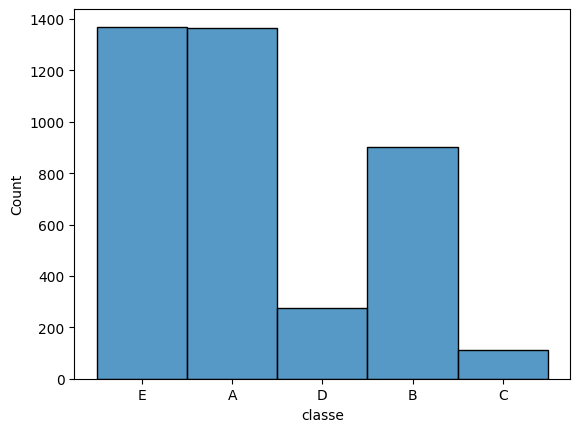

In [52]:
sns.histplot(df[target_column_name])

In [55]:
label_encoder = LabelEncoder()
df[target_column_name] = label_encoder.fit_transform(df[target_column_name])
df[target_column_name].value_counts()

classe
4    1370
0    1365
1     901
3     276
2     112
Name: count, dtype: int64

<Axes: xlabel='classe', ylabel='Count'>

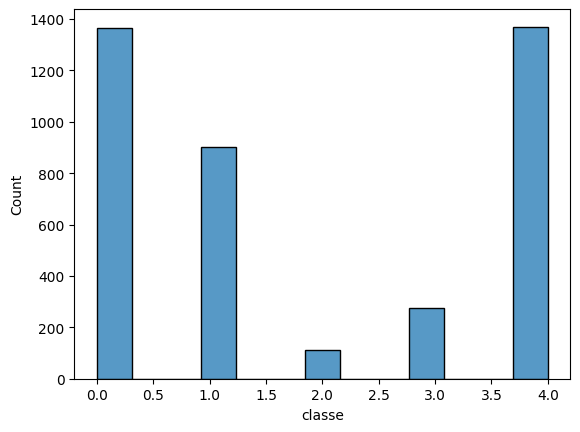

In [56]:
sns.histplot(df[target_column_name])